# Classifying Drug Type using multiple Different Classifiers

In [809]:
import pandas as pd 
import numpy as np 

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

In [810]:
#import the data
drug_data = pd.read_csv("drug200.csv")
drug_data

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [811]:
#one hot encoding function
def onehot_encode(df, column, prefix):
  df = df.copy()
  dummies = pd.get_dummies(df[column], prefix=prefix, dtype=int)
  df = pd.concat([df, dummies], axis=1)
  df = df.drop(column, axis=1)
  return df

In [812]:
#one hot encode non-int elements
drug_data = onehot_encode(drug_data, 'Sex', 'sex')
drug_data = onehot_encode(drug_data, 'BP', 'blood_pressure')
drug_data = onehot_encode(drug_data, 'Cholesterol', 'cholesterol')
drug_data

,Age,Na_to_K,Drug,sex_F,sex_M,blood_pressure_HIGH,blood_pressure_LOW,blood_pressure_NORMAL,cholesterol_HIGH,cholesterol_NORMAL
0,23,25.355,DrugY,1,0,1,0,0,1,0
1,47,13.093,drugC,0,1,0,1,0,1,0
2,47,10.114,drugC,0,1,0,1,0,1,0
3,28,7.798,drugX,1,0,0,0,1,1,0
4,61,18.043,DrugY,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
195,56,11.567,drugC,1,0,0,1,0,1,0
196,16,12.006,drugC,0,1,0,1,0,1,0
197,52,9.894,drugX,0,1,0,0,1,1,0
198,23,14.020,drugX,0,1,0,0,1,0,1


In [813]:
#train test split
features = ['Age', 'Na_to_K', 'blood_pressure_HIGH', 
            'blood_pressure_LOW', 'blood_pressure_NORMAL', 
            'sex_F', 'sex_M', 'cholesterol_HIGH', 'cholesterol_NORMAL']
X = drug_data.loc[:, features]
y = drug_data.loc[:, ['Drug']]

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [814]:
#RandomForestClassifier for importance of features
model = RandomForestClassifier()
model.fit(X, y)

features2 = features
importances = model.feature_importances_
indicies = np.argsort(importances)

c:\Program Files\Python39\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


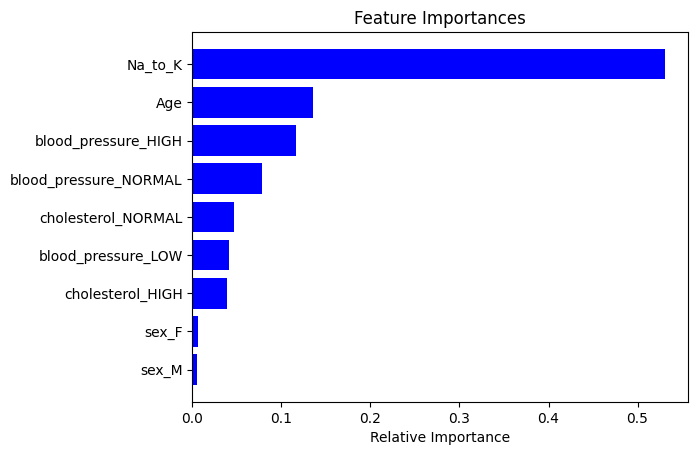

In [815]:
import matplotlib.pyplot as plt
#plot the importances
plt.title('Feature Importances')
plt.barh(range(len(indicies)), importances[indicies], color='b', align='center')
plt.yticks(range(len(indicies)), [features[i] for i in indicies])
plt.xlabel('Relative Importance')
plt.show()

In [816]:
#Models and Scoring
kModel = KNeighborsClassifier()
rModel = RandomForestClassifier()
gModel = GaussianNB()
dModel = DecisionTreeClassifier()
mlpModel = MLPClassifier()
svcModel = SVC()
desRegModel = DecisionTreeRegressor()

#k-nearest neighbors fit
kModel.fit(X_train, y_train)
#and score
k_score = kModel.score(X_test, y_test)


#Random Forest Classifier fit
rModel.fit(X_train, y_train)
#and score
r_score = rModel.score(X_test, y_test)


#Gaussian N.B. fit
gModel.fit(X_train, y_train)
#and score
g_score = gModel.score(X_test, y_test)


#Decision Tree Fit
dModel.fit(X_train, y_train)
#and score
d_score = dModel.score(X_test, y_test)


#MLP fit
mlpModel.fit(X_train, y_train)
#and score
mlpScore = mlpModel.score(X_test, y_test)


#SVC fit
svcModel.fit(X_train, y_train)
#and score
svcScore = svcModel.score(X_test, y_test)


#print scores
print("K-Nearest Neighbors Score: " + str(k_score))
print("Random Forest Classifier Score: " + str(r_score))
print("Gaussian N.B. Score: " + str(g_score))
print("Decision Tree Score: " + str(d_score))
print("MLP Score: " + str(mlpScore))
print("SVC score: " + str(svcScore))

c:\Program Files\Python39\lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


K-Nearest Neighbors Score: 0.76
Random Forest Classifier Score: 1.0
Gaussian N.B. Score: 0.7
Decision Tree Score: 1.0
MLP Score: 0.6
SVC score: 0.74


c:\Program Files\Python39\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Program Files\Python39\lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Program Files\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1105: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Program Files\Python39\lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change th

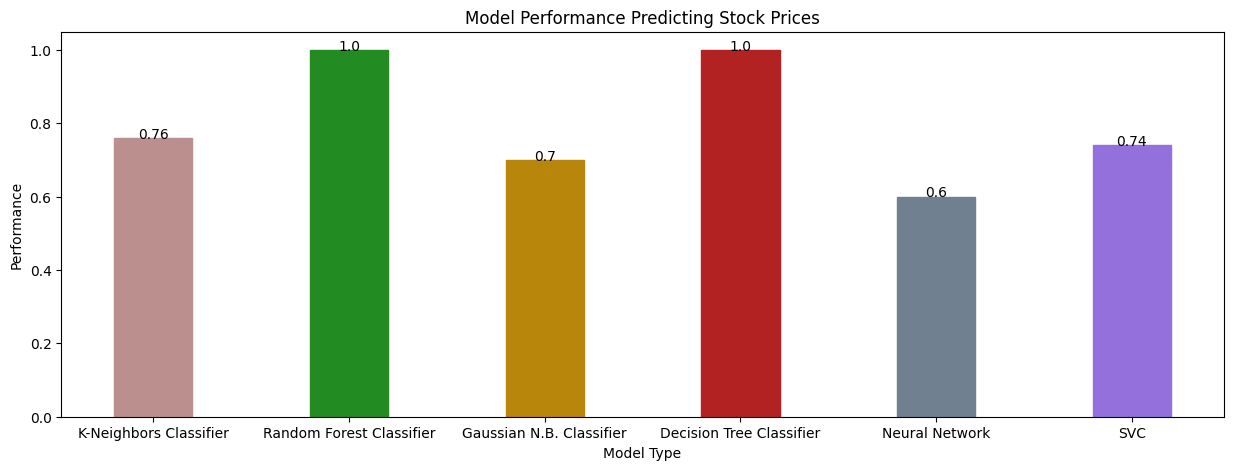

In [817]:
#Graphing performancse
#Create a bar graph showing the difference between the model performances
# function to add value labels
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha='center')

fig = plt.figure(figsize = (15, 5))
# creating the bar plot
xFeatures = ['K-Neighbors Classifier', 'Random Forest Classifier', 'Gaussian N.B. Classifier', 
             'Decision Tree Classifier', 'Neural Network', 'SVC']
yFeatures = [k_score, r_score, g_score, d_score, mlpScore, svcScore]
bars = plt.bar(xFeatures, yFeatures, width = 0.4)
addlabels(xFeatures, yFeatures)
plt.xlabel("Model Type")
plt.ylabel("Performance")
plt.title("Model Performance Predicting Stock Prices")
bars[0].set_color('rosybrown')
bars[1].set_color('forestgreen')
bars[2].set_color('darkgoldenrod')
bars[3].set_color('firebrick')
bars[4].set_color('slategrey')
bars[5].set_color('mediumpurple')
plt.show()